In [1]:
import numpy as np
import pandas as pd
import pickle
import sys, os
import torch
print(torch.__version__)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import plotly.express as px

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

from explainability_analysis.transformer_analysis import *
from explainability_analysis.crop_spectral_signature_analysis import *
from explainability_analysis.visualization_functions import *
from explainability_analysis.visualization_constants import *
figures_base_path = os.path.join(FIGURES_BASE_PATH, "attn_weights_patterns")

def get_attn_and_signature_for_top_n_attention_dates(temporal_attn_weights, spectral_indices, sorting_column="Attention", num_dates=3, occluded_class=None):
    temporal_attn_weights_filtered_classes = temporal_attn_weights.loc[~temporal_attn_weights["Crop type"].isin(CLASSES_TO_EXCLUDE)]
    top_dates = sort_by_attention(temporal_attn_weights, sorting_column).iloc[:num_dates].index
    relevant_attn_weights = temporal_attn_weights_filtered_classes.loc[temporal_attn_weights_filtered_classes["Date"].isin(top_dates)]
    relevant_attn_weights.reset_index(inplace=True)
    spectral_indices_copy = spectral_indices.copy(deep=True)
    spectral_indices_with_attention = pd.merge(spectral_indices_copy, relevant_attn_weights, left_on=["PARCEL_ID","Date"], right_on=["index", "Date"], how="inner")
    spectral_indices_with_attention.rename(columns={"Crop type_y": "Crop type"}, inplace=True)
    spectral_indices_with_attention["Date"] = spectral_indices_with_attention["Date"].apply(lambda x: "{:02d}-{:02d}".format(x.month, x.day))
    
    return spectral_indices_with_attention


def calc_attn_weights_corr(temporal_attention_weights, value_column):
    avg_daily_attn_weights = temporal_attention_weights.groupby(["Date", "Crop type"]).agg("mean").reset_index()
    avg_daily_attn_weights = avg_daily_attn_weights.pivot(index="Date", columns="Crop type", values=value_column)
    corr_values = avg_daily_attn_weights.corr()
    return corr_values
    
def plot_attn_weights_corr(temporal_attention_weights, plot_label, target_classes=None, show_corr_values=True, corr_value_column="Attention"):
    
    plot_data = temporal_attention_weights.copy(deep=True)
    if target_classes is not None: 
        plot_data = temporal_attention_weights.loc[temporal_attention_weights["Crop type"].isin(target_classes)]
    
    fig, axs = plt.subplots(figsize=(7, 4))
    corr_values = calc_attn_weights_corr(plot_data, corr_value_column)
    axs = sns.heatmap(corr_values,cmap="Blues", ax=axs, annot=show_corr_values)
    axs.set_ylabel('')    
    axs.set_xlabel('')
    axs.tick_params(axis='y', rotation=0)
    fig.tight_layout()
    plt.savefig(os.path.join(figure_results_path, '{}.eps'.format(plot_label)), dpi=400)
    
base_model_path = "C:/Users/results/crop-type-classification-explainability"

2.0.1
C:\Users\Ivica Obadic\PycharmProjects\EOExplainability


In [2]:
spectral_indices = get_dataset_spectral_indices()
temporal_attn_weights, temporal_attn_date_class_avg, avg_attention_per_obs_acq_date = get_attn_weights_patterns(base_model_path, "all_dates","1654184128", target_classes=None)

Initializing BavarianCropsDataset train partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/npy\12_classes\blocks\holl\train
Dataset C:/Users/datasets/BavarianCrops/. region holl. partition train.X:20858x(71, 16), y:(20858,) with 12 classes
Initializing BavarianCropsDataset valid partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/npy\12_classes\blocks\holl\valid
Dataset C:/Users/datasets/BavarianCrops/. region holl. partition valid.X:3909x(144, 16), y:(3909,) with 12 classes
Initializing BavarianCropsDataset test partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/npy\12_classes\blocks\holl\test
Dataset C:/Users/datasets/BavarianCrops/. region holl. partition test.X:9583x(144, 16), y:(9583,) with 12 classes
Initializing BavarianCropsDataset train partition in krum
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops/np

In [ ]:
plt.rcParams.update(attn_weight_matrix_viz_fonts)
attn_weights_for_parcel = get_parcel_attn_weights(base_model_path, "all_dates","1654184128", "71529070")
attn_weights_for_parcel.index = attn_weights_for_parcel.index.map(lambda x: datetime.datetime(2018, int(x.split('-')[1]), int(x.split('-')[0])))
attn_weights_for_parcel.index = attn_weights_for_parcel.index.map(lambda x: x.strftime("%b. %d"))
attn_weights_for_parcel.columns = attn_weights_for_parcel.columns.map(lambda x: datetime.datetime(2018, int(x.split('-')[1]), int(x.split('-')[0])))
attn_weights_for_parcel.columns = attn_weights_for_parcel.columns.map(lambda x:  x.strftime("%b. %d"))

fig_width = set_size(40)[0]
fig, ax_attn_weights = plt.subplots(figsize=(fig_width, 0.28))
ax_attn_weights = attn_weights_heatmap(attn_weights_for_parcel, ax_attn_weights, "Greens", "Winter Barley", 23)

fig.tight_layout()
plt.savefig(os.path.join(figures_base_path, '71529070_attn_weights.png'), dpi=400)

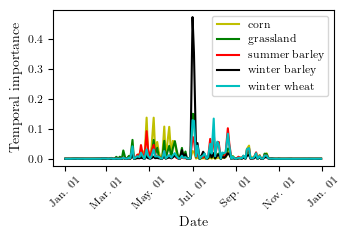

In [3]:
plt.rcParams.update(tex_fonts)
plot_attn_weights(figures_base_path, temporal_attn_date_class_avg,  target_classes = ["grassland","corn", "summer barley", "winter wheat","winter barley"], y_plot_label="Temporal importance")

07-01
Explained variation per principal component: [0.73938726 0.1953666 ]
07-03
Explained variation per principal component: [0.68650943 0.245018  ]
05-07
Explained variation per principal component: [0.81593853 0.15540365]


C:\Users\Ivica Obadic\AppData\Local\Temp\ipykernel_25780\3782934191.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_attn_spectral_indices_target_date['pca-dim-1'] = pca_result[:,0]
C:\Users\Ivica Obadic\AppData\Local\Temp\ipykernel_25780\3782934191.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_attn_spectral_indices_target_date['pca-dim-2'] = pca_result[:,1]
C:\Users\Ivica Obadic\AppData\Local\Temp\ipykernel_25780\3782934191.py:17: SettingWithCopyWarning: 
A value is trying to b

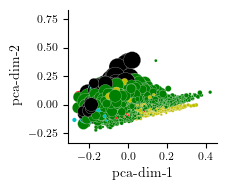

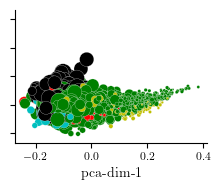

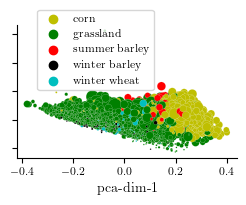

In [4]:
num_dates_to_use = 3
attn_with_signature = get_attn_and_signature_for_top_n_attention_dates(temporal_attn_weights, spectral_indices, num_dates=num_dates_to_use)

#show the dates with highest attention first
top_attention_dates = sort_by_attention(attn_with_signature)

attn_with_signature_and_pca_per_date = []
for i, target_date in enumerate(top_attention_dates.index):
    print(target_date)
#     if target_date == "07-03":
#         continue
    relevant_attn_spectral_indices_target_date = attn_with_signature.loc[attn_with_signature["Date"] == target_date]
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(relevant_attn_spectral_indices_target_date[BANDS].values)
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    relevant_attn_spectral_indices_target_date['pca-dim-1'] = pca_result[:,0]
    relevant_attn_spectral_indices_target_date['pca-dim-2'] = pca_result[:,1]
    
    attn_with_signature_and_pca_per_date.append(relevant_attn_spectral_indices_target_date)
    
    
attn_with_signature_and_pca = pd.concat(attn_with_signature_and_pca_per_date)

fig_widths = [set_size(167)[0], set_size(167)[0], set_size(186)[0]]
x_min_value = min(attn_with_signature_and_pca["pca-dim-1"])
x_max_value = max(attn_with_signature_and_pca["pca-dim-1"])
y_min_value = min(attn_with_signature_and_pca["pca-dim-2"])
y_max_value = max(attn_with_signature_and_pca["pca-dim-2"])

for i, target_date in enumerate(top_attention_dates.index):
    fig, ax = plt.subplots(figsize=(fig_widths[i], 2))
    plot_data = attn_with_signature_and_pca.loc[attn_with_signature_and_pca["Date"] == target_date]
    ax = sns.scatterplot(data=plot_data,
                         x="pca-dim-1", y="pca-dim-2", hue="Crop type",
                         size="Attention", sizes=(1, 200),
                         palette=CROP_TYPE_COLOR_MAPPING, ax=ax)

    ax_handles, ax_labels =  ax.get_legend_handles_labels()
    ax.get_legend().remove()
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_ylim(y_min_value - 0.05, y_max_value + 0.05)
    if i > 0:
         ax.set_ylabel('')
         ax.set_yticklabels([])

    if i == len(top_attention_dates.index) - 1:
        #add only legend for the crop-types
        ax_handles = ax_handles[1:6]
        ax_labels = ax_labels[1:6]

        legend_labels_sorted = sorted(ax_labels)
        legend_handles_sorted = [ax_handles[ax_labels.index(x)] for x in legend_labels_sorted]
        fig.legend(legend_handles_sorted, legend_labels_sorted, loc=1, bbox_to_anchor=(0.64, 1.03))

    fig.tight_layout()
    plt.savefig(os.path.join(figures_base_path, 'spectral_reflectances_{}.png'.format(target_date)), dpi=500)

C:\Users\anaconda3\lib\site-packages\matplotlib\cm.py:440: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


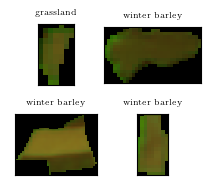

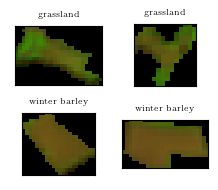

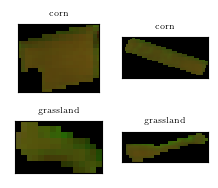

In [5]:
for target_date in top_attention_dates.index:
    visualize_geotiff_parcels(target_date, figures_base_path, show_title=False)

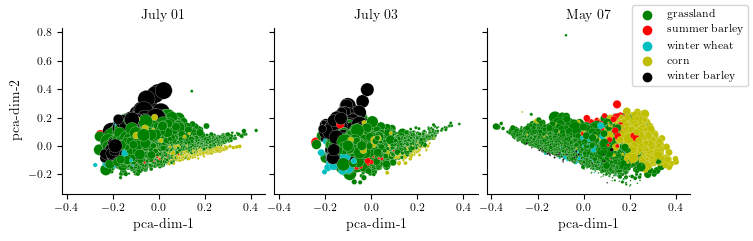

In [6]:
fig_width = set_size(520)[0]
g = sns.relplot(data=attn_with_signature_and_pca,
            x="pca-dim-1", y="pca-dim-2", col="Date",
            hue="Crop type", col_order=top_attention_dates.index,
            size="Attention", sizes=(1, 200),
            palette=CROP_TYPE_COLOR_MAPPING)

g.fig.set_figwidth(fig_width)
g.fig.set_figheight(2)
for i, ax in enumerate(g.axes.flatten()):
    date = top_attention_dates.index[i]
    date_output = datetime.datetime(2018, int(date.split('-')[0]), int(date.split('-')[1]))
    ax.set_title(date_output.strftime("%B %d"), fontweight ="bold")


g.legend.remove()
g.fig.legend(handles=g.legend.legendHandles[1:6], loc=1)

#axs.set_title("Spectral Reflectances on {}".format(target_date))
g.savefig(os.path.join(figures_base_path, 'spectral_reflectances_top_dates.png'), dpi=400)

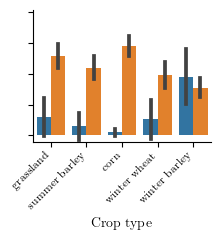

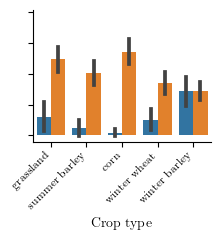

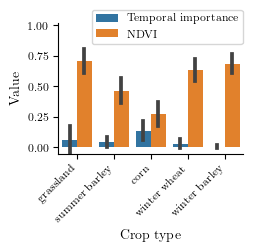

In [7]:
attn_with_signature_long = pd.melt(attn_with_signature_and_pca, id_vars=["Date", "PARCEL_ID", "Crop type"], value_vars=["Attention", "NDVI"], var_name="Metric", value_name="Value")
y_min = min(attn_with_signature_long["Value"])
y_max = max(attn_with_signature_long["Value"])

for i, target_date in enumerate(top_attention_dates.index):
    fig, ax_ndvi_date = plt.subplots(figsize=(fig_widths[i], 2.5))

    data_per_date = attn_with_signature_long.loc[attn_with_signature_long["Date"] == target_date]
    ax_ndvi_date = sns.barplot(x="Crop type", y="Value", hue="Metric", data=data_per_date, ax=ax_ndvi_date, ci="sd",
                          order=["grassland", "summer barley","corn", "winter wheat", "winter barley"])
    ax_ndvi_date.set_xticklabels(ax_ndvi_date.xaxis.get_ticklabels(), rotation=45, ha="right")
    ax_ndvi_date.spines.right.set_visible(False)
    ax_ndvi_date.spines.top.set_visible(False)
    ax_ndvi_date.set_ylim(y_min - 0.05, y_max + 0.05)
    
    ax_ndvi_handles, ax_ndvi_labels =  ax_ndvi_date.get_legend_handles_labels()
    ax_ndvi_labels[ax_ndvi_labels.index("Attention")] = "Temporal importance"
    ax_ndvi_date.legend(ax_ndvi_handles, ax_ndvi_labels, loc="best", bbox_to_anchor=(0.15, 0.8))
    
    if (target_date != "05-07"):
        ax_ndvi_date.get_legend().remove()
        ax_ndvi_date.set_ylabel('')
        ax_ndvi_date.set_yticklabels([])
    
    fig.tight_layout()
    plt.savefig(os.path.join(figures_base_path, 'ndvi_vs_attention_{}.pdf'.format(target_date)))

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from rasterio.plot import reshape_as_raster, reshape_as_image

target_parcel = 71529070
base_parcels_path = "C:/Users/datasets/BavarianCrops/parcel_visualization/parcels_over_time"

data_for_parcel = attn_with_signature_and_pca.loc[attn_with_signature_and_pca["PARCEL_ID"] == target_parcel]
data_for_parcel = data_for_parcel.sort_values(by="Date")
data_for_parcel["TIMESTAMP"] = data_for_parcel['TIMESTAMP'].dt.strftime('%B %d')
fig_width = set_size(260)[0]
fig, axs = plt.subplots(figsize=(fig_width, 2.8))
axs.set_ylim(-0.01, (max(data_for_parcel["Attention"])) + 0.2)
axs = sns.stripplot(data=data_for_parcel, x="TIMESTAMP", y="Attention", ax = axs, jitter=False)
for i in range(len(data_for_parcel.index)):
    attn_at_date = data_for_parcel.iloc[i]
    date = attn_at_date["Date"]
    tiff_image_path = os.path.join(base_parcels_path, "{}_{}.tif".format(target_parcel, date))
    image = load_tiff_image(tiff_image_path)
    image = reshape_as_image(image)
    image = OffsetImage(image, zoom=2.5)
    ab = AnnotationBbox(image, (i, attn_at_date["Attention"]  + 0.16), frameon=False)
    axs.add_artist(ab)

axs.set_xlabel('Date')
axs.set_ylabel('Temporal importance')

axs.spines.right.set_visible(False)
axs.spines.top.set_visible(False)

plt.savefig(os.path.join(figures_base_path, '{}.pdf'.format("{}_parcel_viz".format(target_parcel))))
plt.savefig(os.path.join(figures_base_path, '{}.png'.format("{}_parcel_viz".format(target_parcel))), dpi=400)